In [8]:
import sqlite3
import pandas as pd
values = pd.read_csv('values.csv')
values

#I have loaded my data from WALS CLDF dataset https://github.com/cldf-datasets/wals
#values is a dataset of all data points in WALS maps

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Example_ID
0,81A-aab,aab,81A,2,81A-2,NaN,Nekitel-1985[94],NaN
1,82A-aab,aab,82A,1,82A-1,NaN,Nekitel-1985[94],NaN
2,83A-aab,aab,83A,2,83A-2,NaN,Nekitel-1985[94],NaN
3,87A-aab,aab,87A,2,87A-2,NaN,Nekitel-1985[95],NaN
4,88A-aab,aab,88A,2,88A-2,NaN,Nekitel-1985[95],NaN
...,...,...,...,...,...,...,...,...
76470,144B-zzo,zzo,144B,3,144B-3,NaN,Sonnenschein-2005[114],NaN
76471,144T-zzo,zzo,144T,1,144T-1,NaN,Sonnenschein-2005[114],NaN
76472,144V-zzo,zzo,144V,1,144V-1,NaN,Sonnenschein-2005[114],NaN
76473,144W-zzo,zzo,144W,6,144W-6,NaN,Sonnenschein-2005[114],NaN


In [10]:
languages = pd.read_csv('languages.csv')
languages

#this dataset is a mapping of languages to their families, locations, Glottolog codes, etc.

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,GenusIcon,ISO_codes,Samples_100,Samples_200,Country_ID,Source
0,aab,Arapesh (Abu),Papunesia,-3.450000,142.950000,abua1245,aah,Torricelli,NaN,Kombio-Arapesh,c51CC56,aah,False,False,PG,Nekitel-1985
1,aar,Aari,Africa,6.000000,36.583333,aari1239,aiw,Afro-Asiatic,Omotic,South Omotic,c708033,aiw,False,False,ET,Hayward-1990a
2,aba,Abau,Papunesia,-4.000000,141.250000,abau1245,aau,Sepik,NaN,Abau,c807433,aau,False,False,PG,Bailey-1975
3,abb,Arabic (Chadian),Africa,13.833333,20.833333,chad1249,shu,Afro-Asiatic,NaN,Semitic,cB3CC51,shu,False,False,TD,Abu-Absi-1995
4,abd,Abidji,Africa,5.666667,-4.583333,abid1235,abi,Niger-Congo,Kwa,Agneby,c523380,abi,False,False,CI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,zte,Zapotec (Texmelucan),North America,16.500000,-97.166667,texm1235,zpz,Oto-Manguean,NaN,Zapotecan,c5162CC,zpz,False,False,MX,NaN
2658,zul,Zulu,Africa,-30.000000,30.000000,zulu1248,zul,Niger-Congo,Benue-Congo,Bantu,cC3CC51,zul,True,True,ZA,Canonici-1989 Canonici-1995 Cope-1982 Dahl-198...
2659,zun,Zuni,North America,35.083333,-108.833333,zuni1245,zun,NaN,NaN,NaN,c805C33,zun,False,False,US,Bunzel-1933-1938 Bybee-et-al-1994 Cook-1975 Mi...
2660,zya,Zapotec (Yatzachi),North America,17.200000,-96.200000,yatz1235,zav,Oto-Manguean,NaN,Zapotecan,c5162CC,zav,False,False,MX,Butler-1980


In [11]:
examples = pd.read_csv('examples.csv')
examples

#this dataset is a collection of glossed examples from multiple languages

,ID,Language_ID,Primary_Text,Analyzed_Word,Gloss,Translated_Text,Meta_Language_ID,Comment
0,igt-1,mnd,tāmen tōu zìxíngchē,tāmen\ttōu\tzìxíngchē,3PL\tsteal\tbicycle,They steal bicycles.,NaN,NaN
1,igt-2,mnd,[wǒ gěi nǐ de] shū,[wǒ\tgěi\tnǐ\tde]\tshū,[1SG\tgive\t2SG\tLINK]\tbook,the book [that I gave you],NaN,NaN
2,igt-3,nbd,dımın ıdw ṍww(ı),dımın\tıdw\tṍww(ı),ten\teight\ttwo,82,NaN,NaN
3,igt-4,geo,v-,v-,1 SG /1 PL,I we,NaN,NaN
4,igt-5,dre,troa traqa la nekönatr,troa\ttraqa\tla\tnekönatr,oblig\tarrive\tthe\tchild,the child must come,NaN,NaN
...,...,...,...,...,...,...,...,...
3902,igt-3924,cmn,ɨ = tsaa = tɨi tsa miʔatɨ =,ɨ =\ttsaa =\ttɨi\ttsa\tmiʔatɨ =,your\tgood\tfriend\ttop\tgoes,your best friend is leaving,NaN,NaN
3903,igt-3925,cmn,pisunii nɨmmɨ kookoʔa nii kɨHtokweʔetɨ =,pisunii\tnɨmmɨ\tkookoʔa\tnii\tkɨHtokweʔetɨ =,skunk\tour\tchicken\tacc.pl\tkills,the skunk kills our chickens,NaN,NaN
3904,igt-3926,cmn,nɨnnɨ se paakwapitI̵ =,nɨnnɨ\tse\tpaakwapitI̵ =,we.excl\tcntr\tswam,we swam,NaN,NaN
3905,igt-3927,cmn,nɨ se tamma = ku = uhti makan,nɨ\tse\ttamma = ku =\tuhti\tmakan,I\tcntr\tmuch\tthey.acc\tfeed,I fed them a lot,NaN,NaN


In [153]:
conn = sqlite3.connect('Hw2.db')
c = conn.cursor()


#here I create a database and connect to it

In [7]:
table_name = 'valuees'
conn = sqlite3.connect('mydb.db')
query = f'Create table if not Exists {table_name} (ID text, Name text, Parameter_ID text, Value integer, Code_ID text, Comment  text, Source text)'
conn.execute(query)
values.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

#Here I insert a table 'values' into the database

In [9]:
table_name = 'languages'
conn = sqlite3.connect('mydb.db')
query = f'Create table if not Exists {table_name} (ID text, Language_ID text, Macroarea text, Latitude real, Longitude real, Glottocode text, ISO639P3code text, Family text, Subfamily text, Genus text, GenusIcon text, ISO_codes text, Samples_100 text, Samples_200 text, Country_ID text, Example_ID text, Source text)'
conn.execute(query)
languages.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

#Here I insert a table 'languages' into the database

In [11]:
table_name = 'examples'
conn = sqlite3.connect('mydb.db')
query = f'Create table if not Exists {table_name} (ID text, Language_ID text, Analyzed_Word text, Gloss text, Translated_Text text, Meta_Language_ID text, Comment text)'
conn.execute(query)
examples.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

#Here I insert a table 'examples' into the database

In [107]:
cnx = sqlite3.connect('mydb.db')
df = pd.read_sql_query("SELECT * FROM examples", cnx)
df
cnx.commit()
cnx.close()

#I read a database from a file into a dataframe

In [16]:
examples.dropna(how="all", axis=1).head()

#I omit all columns with empty values

,ID,Language_ID,Primary_Text,Analyzed_Word,Gloss,Translated_Text
0,igt-1,mnd,tāmen tōu zìxíngchē,tāmen\ttōu\tzìxíngchē,3PL\tsteal\tbicycle,They steal bicycles.
1,igt-2,mnd,[wǒ gěi nǐ de] shū,[wǒ\tgěi\tnǐ\tde]\tshū,[1SG\tgive\t2SG\tLINK]\tbook,the book [that I gave you]
2,igt-3,nbd,dımın ıdw ṍww(ı),dımın\tıdw\tṍww(ı),ten\teight\ttwo,82
3,igt-4,geo,v-,v-,1 SG /1 PL,I we
4,igt-5,dre,troa traqa la nekönatr,troa\ttraqa\tla\tnekönatr,oblig\tarrive\tthe\tchild,the child must come


In [15]:
values.dropna(how="all", axis=1).head()

#I omit all columns with empty values

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Example_ID
0,81A-aab,aab,81A,2,81A-2,NaN,Nekitel-1985[94],NaN
1,82A-aab,aab,82A,1,82A-1,NaN,Nekitel-1985[94],NaN
2,83A-aab,aab,83A,2,83A-2,NaN,Nekitel-1985[94],NaN
3,87A-aab,aab,87A,2,87A-2,NaN,Nekitel-1985[95],NaN
4,88A-aab,aab,88A,2,88A-2,NaN,Nekitel-1985[95],NaN


In [18]:
languages[languages["Latitude"] > 66]
#Languages which are located to the north of Arctic Circle
#Note that most of them are from Eurasia or Eskimo-Aleut languages

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,GenusIcon,ISO_codes,Samples_100,Samples_200,Country_ID,Source
442,chk,Chukchi,Eurasia,67.000000,-173.00,chuk1273,ckt,Chukotko-Kamchatkan,NaN,Northern Chukotko-Kamchatkan,cCC8451,ckt,True,True,RU,Bogoras-1922 Dunn-1999 Kampfe-and-Volodin-1995...
610,dol,Dolgan,Eurasia,71.250000,98.00,dolg1241,dlg,Altaic,NaN,Turkic,c778033,dlg,False,False,RU,Ubrjatova-1985
648,ene,Enets,Eurasia,67.500000,86.50,enet1250,NaN,Uralic,NaN,Samoyedic,c578033,enf enh,False,False,RU,Kunnap-1999a Tereshchenko-1966b Tereshchenko-1...
662,evn,Even,Eurasia,68.000000,130.00,even1260,eve,Altaic,NaN,Tungusic,c798033,eve,False,False,RU,Benzing-1955 Cincius-and-Rises-1952 Malchukov-...
921,inu,Iñupiaq,North America,67.000000,-161.00,nort2943,esi,Eskimo-Aleut,NaN,Eskimo,cCC7351,esi,False,False,US,Webster-and-Zibell-1970 Webster-and-Zibell-nd
1051,kgt,Kangiryuarmiut,North America,68.333333,-133.75,copp1244,ikt,Eskimo-Aleut,NaN,Eskimo,cCC7351,ikt,False,False,CA,Lowe-1983
1212,kth,Kutchin,North America,67.000000,-146.00,gwic1235,gwi,Na-Dene,NaN,Athapaskan,c8C51CC,gwi,False,False,CA US,Ritter-1976
1691,nen,Nenets (Forest),Eurasia,69.000000,72.00,nene1251,yrk,Uralic,NaN,Samoyedic,c578033,yrk,False,True,RU,Castren-1854 Collinder-1957 Decsy-1966 Decsy-1...
1697,nga,Nganasan,Eurasia,71.000000,93.00,ngan1291,nio,Uralic,NaN,Samoyedic,c578033,nio,False,False,RU,Castren-1966 Helimski-1998a Tereshchenko-1966c...
1787,ntu,Nenets,Eurasia,70.000000,76.00,nene1249,yrk,Uralic,NaN,Samoyedic,c578033,yrk,False,False,RU,Castren-1854 Collinder-1957 Decsy-1966 Decsy-1...


In [19]:
languages["Family"].value_counts()
#top language families by the number of languages

Niger-Congo      325
Austronesian     324
Indo-European    176
Afro-Asiatic     145
Sino-Tibetan     145
                ... 
Koman              1
Kariri             1
Pauwasi            1
Araucanian         1
Kapixana           1
Name: Family, Length: 179, dtype: int64

In [6]:
values2 = values[values["Parameter_ID"] == "28A"]
values2

#Here I make a new dataframe with values from the map on case syncretism (https://wals.info/feature/28A#2/18.0/149.2)
#Later I will mainly explore case syncretism

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Example_ID
99,28A-abi,abi,28A,1,28A-1,NaN,Najlis-1966,NaN
184,28A-abk,abk,28A,1,28A-1,NaN,Hewitt-1979,NaN
727,28A-aco,aco,28A,1,28A-1,NaN,Miller-1965,NaN
1057,28A-aeg,aeg,28A,1,28A-1,NaN,Mitchell-1962,NaN
1487,28A-ain,ain,28A,1,28A-1,NaN,Refsing-1986,NaN
...,...,...,...,...,...,...,...,...
75054,28A-ypk,ypk,28A,2,28A-2,"<div class=""example""> <table border=""0""> ...",Jacobson-1995,NaN
75245,28A-yuc,yuc,28A,1,28A-1,NaN,Wagner-1933-1938,NaN
75439,28A-yur,yur,28A,2,28A-2,"<div class=""example""> <table border=""0""> ...",Robins-1958,NaN
76051,28A-zqc,zqc,28A,4,28A-4,NaN,Harrison-et-al-1981,NaN


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
def change_values(text):
    if text == 1:
        text = 'No case marking'
    if text == 2:
        text = 'Core cases only'
    if text == 3:
        text = 'Core and non-core'
    if text == 4:
        text = 'No syncretism'
    return text
values3 = values2["Value"].apply(change_values)

#In this cell I turn the number values into meaningful text and make a smaller df with one column
#It will be useful for the graph

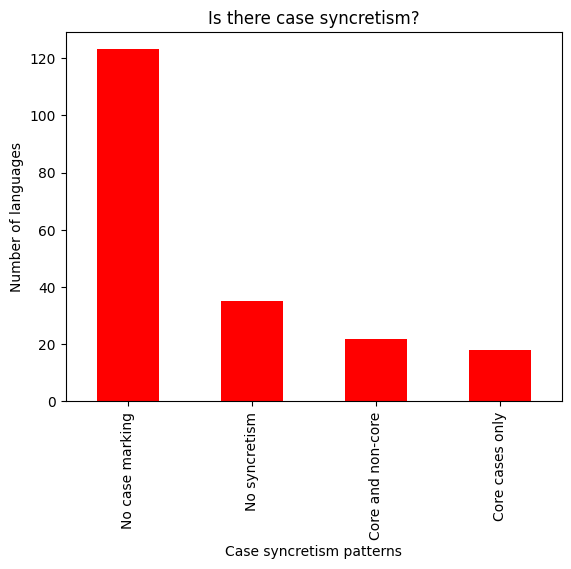

In [19]:
values3.value_counts().plot.bar(color='red')
plt.title('Is there case syncretism?')
plt.xlabel('Case syncretism patterns')
plt.ylabel('Number of languages');

#Here I make a bar plot of number of languages with case syncretism 
#There is mostly no case marking. When there is, there is often no syncretism

In [13]:
languages = languages.rename(columns={'ID': 'Language_ID'})
dfmerge = pd.merge(languages, values2, how='inner', on = "Language_ID")
dfmerge

#What happens here is that I merge two datasets (languages and values) into a single one
#It will be useful later when I'll need to get the data for a language based on a value

,Language_ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,...,Samples_200,Country_ID,Source_x,ID,Parameter_ID,Value,Code_ID,Comment,Source_y,Example_ID
0,abi,Abipón,South America,-29.000000,-61.000000,abip1241,axb,Guaicuruan,NaN,Abipon,...,True,AR,Bybee-et-al-1994 Dobrizhoffer-1902 Najlis-1966,28A-abi,28A,1,28A-1,NaN,Najlis-1966,NaN
1,abk,Abkhaz,Eurasia,43.083333,41.000000,abkh1244,abk,Northwest Caucasian,NaN,Northwest Caucasian,...,True,GE,Bybee-et-al-1994 Gecadze-1979 Hewitt-1979 Hewi...,28A-abk,28A,1,28A-1,NaN,Hewitt-1979,NaN
2,aco,Acoma,North America,34.916667,-107.583333,west2632,kjq,Keresan,NaN,Keresan,...,True,US,Maring-1967 Miller-1965 Miller-1966 Nichols-19...,28A-aco,28A,1,28A-1,NaN,Miller-1965,NaN
3,aeg,Arabic (Egyptian),Africa,30.000000,31.000000,egyp1253,arz,Afro-Asiatic,NaN,Semitic,...,True,EG,Abdel-Massih-et-al-1979 Brustad-2000 Eisele-19...,28A-aeg,28A,1,28A-1,NaN,Mitchell-1962,NaN
4,ain,Ainu,Eurasia,43.000000,143.000000,ainu1240,ain,NaN,NaN,NaN,...,True,JP,Alpatov-et-al-2007 Dettmer-1989 Nichols-1992 P...,28A-ain,28A,1,28A-1,NaN,Refsing-1986,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,ypk,Yup'ik (Central),North America,59.500000,-160.000000,cent2127,esu,Eskimo-Aleut,NaN,Eskimo,...,True,US,Benua-1995 Corbett-and-Mithun-1996 Jacobson-19...,28A-ypk,28A,2,28A-2,"<div class=""example""> <table border=""0""> ...",Jacobson-1995,NaN
194,yuc,Yuchi,North America,35.750000,-86.750000,yuch1247,yuc,NaN,NaN,NaN,...,True,US,Ballard-1975 Crawford-1973 Linn-2001 Mithun-19...,28A-yuc,28A,1,28A-1,NaN,Wagner-1933-1938,NaN
195,yur,Yurok,North America,41.333333,-124.000000,yuro1248,yur,Algic,NaN,Yurok,...,True,US,Garrett-2001 Robins-1958,28A-yur,28A,2,28A-2,"<div class=""example""> <table border=""0""> ...",Robins-1958,NaN
196,zqc,Zoque (Copainalá),North America,17.000000,-93.250000,copa1236,zoc,Mixe-Zoque,NaN,Mixe-Zoque,...,True,MX,Harrison-et-al-1981 Knudson-1975 Wonderly-1947...,28A-zqc,28A,4,28A-4,NaN,Harrison-et-al-1981,NaN


In [73]:
dfnew = dfmerge[['Value', 'Macroarea']]
usl1 = dfnew["Value"] == 2
usl2 = dfnew["Value"] == 3
usl = [usl1[i] or usl2[i] for i in range(len(dfnew))]
dfnew2 = dfnew[usl]
#Here I select the rows with the values '2' and '3' (languages where core cases are syncretic and non-core cases are syncretic)

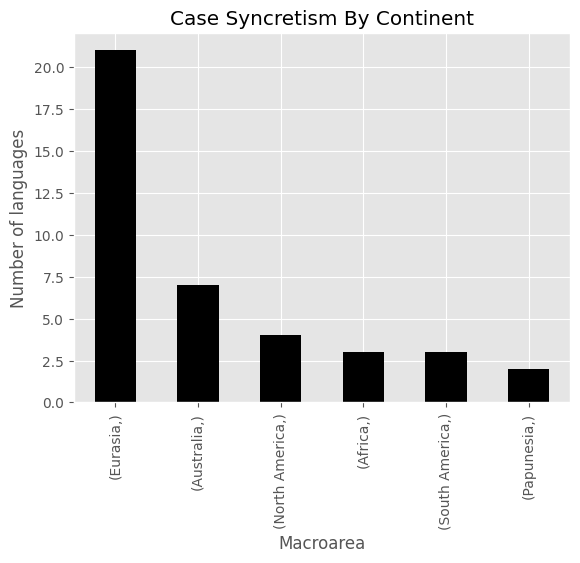

In [85]:
df3 = dfnew2.drop(["Value"], axis=1)
df3.value_counts().plot.bar(color='black')
plt.title('Case Syncretism By Continent')
plt.xlabel('Macroarea')
plt.ylabel('Number of languages');

#This map explores case syncretism by a continent
#Eurasia clearly beats all other languages on a huge margin
#The sample is quite balanced across continents, so it is not a biased selection

In [86]:
dflat = dfmerge[['Value', 'Latitude']]
usl1 = dflat["Value"] == 2
usl2 = dflat["Value"] == 3
usl = [usl1[i] or usl2[i] for i in range(len(dflat))]
dflat2 = dflat[usl]

#This cell selects the latitudes of languages with case syncretism

,Value,Latitude
7,3,-12.333333
9,3,40.000000
24,2,43.000000
25,3,36.500000
30,3,67.000000
32,3,33.500000
42,2,52.000000
46,2,-17.833333
47,3,62.000000
48,3,48.000000


In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23
dflat3 = dflat2.drop(["Value"], axis=1)

#Here I import some libraries and dehele a column 'value', which is of no use once I've selected languages with syncretic cases

Text(0.5, 0, 'Language ID')

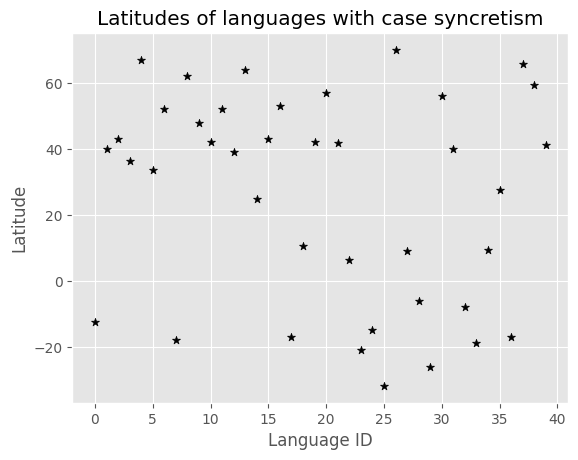

In [98]:
list1 = list(range(0,(len(dflat3))))
dflat3['Counts'] = list1
plt.scatter(dflat3['Counts'], dflat3['Latitude'], color='black', label='group 1', marker='*')
plt.title('Latitudes of languages with case syncretism')
plt.ylabel('Latitude')
plt.xlabel('Language ID')

#This plot can be a little misleading. I map the latitutes of languages with case cyncretism.
#+90 is the North Pole, -90 is the South Pole
#The X axis actually means nothing
#The plot shows that the languages with case syncretism mostly can be mainly found in Northern hemisphere

In [104]:
dfneww = dfmerge[['Value', 'Macroarea', 'Family']]
usl1 = dfneww["Value"] == 2
usl2 = dfneww["Value"] == 3
usl = [usl1[i] or usl2[i] for i in range(len(dfneww))]
dfneww2 = dfneww[usl]
dfneww2

#Here I once again select case-syncretic languages and take 3 columns out of the dataset

,Value,Macroarea,Family
7,3,South America,Pano-Tacanan
9,3,Eurasia,Indo-European
24,2,Eurasia,NaN
25,3,Eurasia,NaN
30,3,Eurasia,Chukotko-Kamchatkan
32,3,North America,Uto-Aztecan
42,2,Eurasia,Indo-European
46,2,Papunesia,Austronesian
47,3,Eurasia,Uralic
48,3,Eurasia,Indo-European


In [105]:
dfneww3 = dfneww2[dfneww2["Macroarea"] == "Eurasia"]
dfneww3

#I select only languages from Eurasia

,Value,Macroarea,Family
9,3,Eurasia,Indo-European
24,2,Eurasia,NaN
25,3,Eurasia,NaN
30,3,Eurasia,Chukotko-Kamchatkan
42,2,Eurasia,Indo-European
47,3,Eurasia,Uralic
48,3,Eurasia,Indo-European
51,3,Eurasia,Kartvelian
52,3,Eurasia,Indo-European
55,3,Eurasia,Indo-European


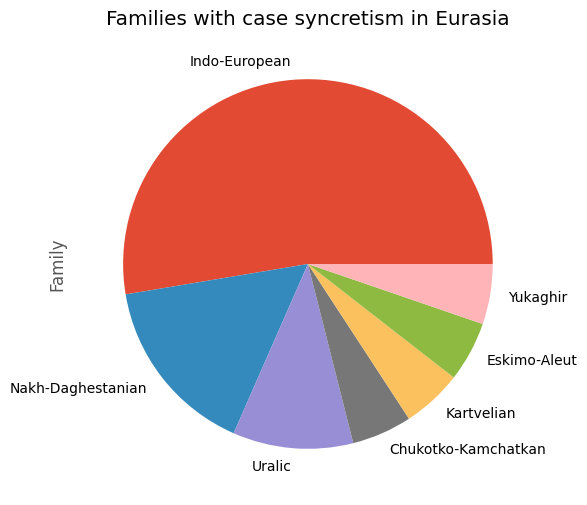

In [106]:
plt.figure(figsize=(6, 6))
dfneww3['Family'].value_counts().plot(kind='pie');
plt.title('Families with case syncretism in Eurasia');

#This pie chart shows different families with case syncretisms in Eurasia
#The main three are Indo-European, Nakh-Daghestanian and Uralic
#Interestingly, there are no Turkic or Tungusic languages here, which are too agglutinative
#The Uralic languages that exhibit this syncretism are Saami and Samoyedic, which have complex nominal morphology

In [122]:
turkishraw = examples[examples['Language_ID'] == 'tur']
turkishraw

#Here's a final part of my project, where I select Turkish examples
#Then I'll gloss them on my own and compare to existing glosses

,ID,Language_ID,Primary_Text,Analyzed_Word,Gloss,Translated_Text,Meta_Language_ID,Comment
134,igt-131,tur,Ahmet gel-di.,Ahmet\tgel-di.,Ahmet\tcome-PST.DIR.EVD,‘Ahmet came.’ (witnessed by the speaker),NaN,NaN
135,igt-132,tur,Ahmet gel-miş,Ahmet\tgel-miş,Ahmet\tcome-PST.INDIR.EVD,‘Ahmet came.’ (unwitnessed by the speaker),NaN,NaN
594,igt-591,tur,iki yüz elli bir,iki\tyüz\telli\tbir,two\thundred\tfifty\tone,251 (i.e. 2 x 100 + 50 + 1),NaN,NaN
814,igt-796,tur,[kitab-ı al-an] öğrenci,[kitab-ı\tal-an]\töğrenci,book-ACC\tbuy-PTCP\tstudent,the student who bought the book,NaN,NaN
815,igt-797,tur,[öğrenci-nin al-dığ-ı] kitap,[öğrenci-nin\tal-dığ-ı]\tkitap,student-GEN\tbuy-NMLZ-3SG\tbook,the book which the student bought,NaN,NaN
816,igt-798,tur,[cumhurbaşkanı-nın gel-diğ-i] haber-i,[cumhurbaşkanı-nın\tgel-diğ-i]\thaber-i,president-GEN\tcome-NMLZ-3SG\tnews-3SG,the news that the president has come,NaN,NaN
951,igt-929,tur,Okul-a git !,Okul-a\tgit\t!,school-\tDAT\tgo.IMP.2SG,Go to school!,NaN,NaN
952,igt-930,tur,Okul-a git - me !,Okul-a\tgit - me !,school- DAT\tgo.IMP.2SG-NEG,Don’t go to school!,NaN,NaN
953,igt-931,tur,Okul-a gid-iyor- sun .,Okul-a\tgid-iyor-\tsun\t.,school-\tDAT\tgo-\tCONT-IND.PRES.2SG,You are going to school,NaN,NaN
954,igt-932,tur,Okul-a git- m -iyor- sun .,Okul-a\tgit- m -iyor- sun .,school- DAT\tgo- NEG-CONT-IND.PRES.2SG,You are not going to school,NaN,NaN


In [151]:
import zeyrek
analyzer = zeyrek.MorphAnalyzer()
morphs = []
morph1 = ''
for row in turkishraw["Primary_Text"]:
    row = row.replace('-', '')
    for p in analyzer.analyze(row):
        if p:
            list1 = (p[0].morphemes)
            morph1 += (' '.join(list1))
    morphs.append(morph1)

#Here I use zeyrek, a Turkish morphological parser (https://github.com/obulat/zeyrek)
#In this cycle I iterate over Turkish text, parse each line, and then I write each result into a separate line
#Each line is a sequence of morphemes, like Noun A3sgVerb Past A3sgPunc

In [152]:
turkishraw['My_Glosses'] = morphs
turkishraw

#Here I make a separate column 'My_Glosses' in the Turkish dataframe
#The Turkish glosses are added do this column
#It is worse than the original glosses...

C:\Users\Alexander\AppData\Local\Temp\ipykernel_6680\2896225126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkishraw['My_Glosses'] = morphs


,ID,Language_ID,Primary_Text,Analyzed_Word,Gloss,Translated_Text,Meta_Language_ID,Comment,My_Glosses
134,igt-131,tur,Ahmet gel-di.,Ahmet\tgel-di.,Ahmet\tcome-PST.DIR.EVD,‘Ahmet came.’ (witnessed by the speaker),NaN,NaN,Noun A3sgVerb Past A3sgPunc
135,igt-132,tur,Ahmet gel-miş,Ahmet\tgel-miş,Ahmet\tcome-PST.INDIR.EVD,‘Ahmet came.’ (unwitnessed by the speaker),NaN,NaN,Noun A3sgVerb Past A3sgPuncNoun A3sgVerb NarrP...
594,igt-591,tur,iki yüz elli bir,iki\tyüz\telli\tbir,two\thundred\tfifty\tone,251 (i.e. 2 x 100 + 50 + 1),NaN,NaN,Noun A3sgVerb Past A3sgPuncNoun A3sgVerb NarrP...
814,igt-796,tur,[kitab-ı al-an] öğrenci,[kitab-ı\tal-an]\töğrenci,book-ACC\tbuy-PTCP\tstudent,the student who bought the book,NaN,NaN,Noun A3sgVerb Past A3sgPuncNoun A3sgVerb NarrP...
815,igt-797,tur,[öğrenci-nin al-dığ-ı] kitap,[öğrenci-nin\tal-dığ-ı]\tkitap,student-GEN\tbuy-NMLZ-3SG\tbook,the book which the student bought,NaN,NaN,Noun A3sgVerb Past A3sgPuncNoun A3sgVerb NarrP...
816,igt-798,tur,[cumhurbaşkanı-nın gel-diğ-i] haber-i,[cumhurbaşkanı-nın\tgel-diğ-i]\thaber-i,president-GEN\tcome-NMLZ-3SG\tnews-3SG,the news that the president has come,NaN,NaN,Noun A3sgVerb Past A3sgPuncNoun A3sgVerb NarrP...
951,igt-929,tur,Okul-a git !,Okul-a\tgit\t!,school-\tDAT\tgo.IMP.2SG,Go to school!,NaN,NaN,Noun A3sgVerb Past A3sgPuncNoun A3sgVerb NarrP...
952,igt-930,tur,Okul-a git - me !,Okul-a\tgit - me !,school- DAT\tgo.IMP.2SG-NEG,Don’t go to school!,NaN,NaN,Noun A3sgVerb Past A3sgPuncNoun A3sgVerb NarrP...
953,igt-931,tur,Okul-a gid-iyor- sun .,Okul-a\tgid-iyor-\tsun\t.,school-\tDAT\tgo-\tCONT-IND.PRES.2SG,You are going to school,NaN,NaN,Noun A3sgVerb Past A3sgPuncNoun A3sgVerb NarrP...
954,igt-932,tur,Okul-a git- m -iyor- sun .,Okul-a\tgit- m -iyor- sun .,school- DAT\tgo- NEG-CONT-IND.PRES.2SG,You are not going to school,NaN,NaN,Noun A3sgVerb Past A3sgPuncNoun A3sgVerb NarrP...
